# EDA датасета и поиск ошибок

In [12]:
import json
import glob
import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from tqdm.notebook import tqdm

In [3]:
files = glob.glob('./data/min_of_nature/markup/*.json')[1:]  # removing config file
files.sort()

In [5]:
BASE_DIR = 'data/min_of_nature/'
IMAGES_DIR = os.path.join(BASE_DIR, 'images')
MARKUPS_DIR = os.path.join(BASE_DIR, 'markup')

In [6]:
def read_img_by_name(image_name):
     return cv2.imread(os.path.join(IMAGES_DIR, image_name))

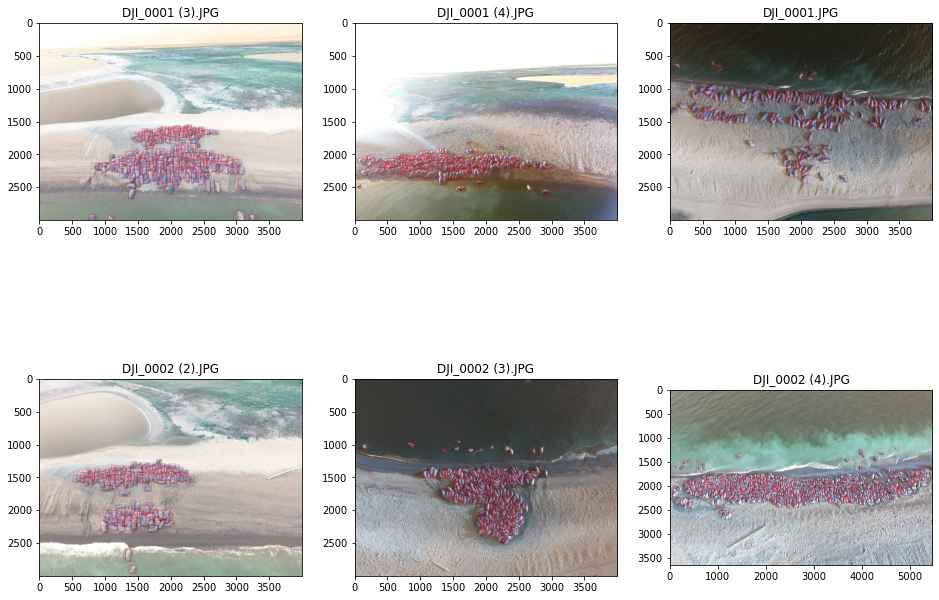

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

for i in range(len(axes.flat)):
    json_path = files[1 + i]
    
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    image_name = os.path.basename(json_path).split('.json')[0] + '.JPG'
    img = read_img_by_name(image_name)
    
    for segment in data:
        bbox = list(map(int, segment['bbox']))
        x, y = bbox[:2]
        w, h = bbox[2:]

        cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 2)
    
    axes.flat[i].set_title(image_name)
    axes.flat[i].imshow(img)

In [9]:
data = []

for filepath in files:
    with open(filepath, 'r') as f:
        segment = json.load(f)
    
    if not all(['segmentation_poly' in s for s in segment]):
        print(segment)
        break
        
    image_name = os.path.basename(filepath).split('.json')[0] + '.JPG'
    img = read_img_by_name(image_name) 
    
    data.append((image_name, len(segment)))

In [10]:
all(['segmentation_poly' in s for s in segment])

True

In [12]:
walrus_count_df = pd.DataFrame(data, columns=['image_name', 'count']).sort_values('count')

In [13]:
walrus_count_df.tail()

,image_name,count
79,DJI_0056.JPG,811
75,DJI_0052.JPG,817
77,DJI_0054.JPG,820
76,DJI_0053.JPG,822
90,DJI_0079.JPG,907


In [14]:
walrus_count_df.to_csv('data/walrus_count.csv')

In [94]:
np.unique(walrus_count_df['shape'], return_counts=True)

(array([(1088, 1632, 3), (3000, 4000, 3), (3648, 5472, 3)], dtype=object),
 array([ 4, 57, 63]))

<AxesSubplot:xlabel='count', ylabel='Count'>

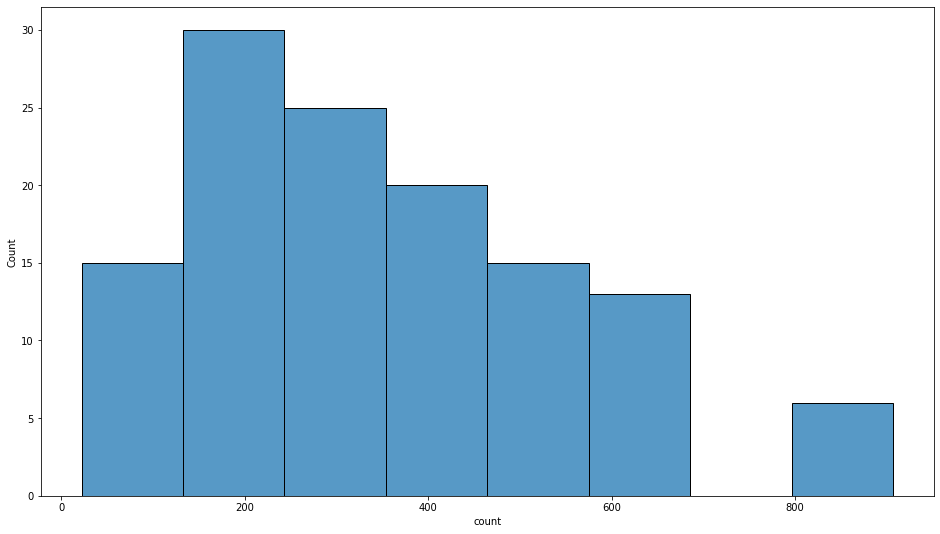

In [69]:
plt.figure(figsize=(16, 9))
sns.histplot(data=walrus_count_df, x='count')

In [ ]:
img = read_img_by_name('DJI_0079.JPG')

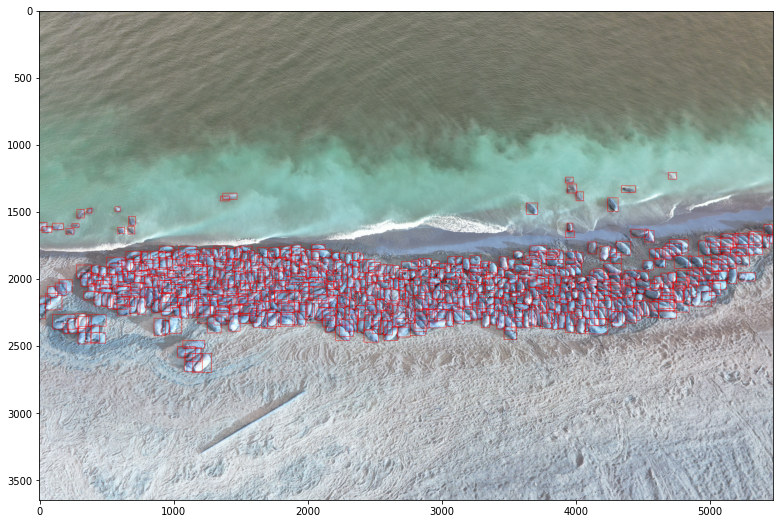

In [77]:
plt.figure(figsize=(16, 9))
plt.imshow(img)
plt.show()

## Validation

In [47]:
def validate_segment(img, segment):
    keys = ['segmentation_poly', 'bbox', 'category_id']
    
    h, w = img.shape[:2]
    
    for key in keys:
        assert key in segment
        assert segment[key] is not None
    
    # assert segment['bbox'][0] + segment['bbox'][2] < w
    # assert segment['bbox'][1] + segment['bbox'][3] < h

In [48]:
for filepath in tqdm(files):
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    image_name = os.path.basename(filepath).split('.json')[0] + '.JPG'
    img = read_img_by_name(image_name) 
    
    for segment in data:
        validate_segment(img, segment)

  0%|          | 0/124 [00:00<?, ?it/s]

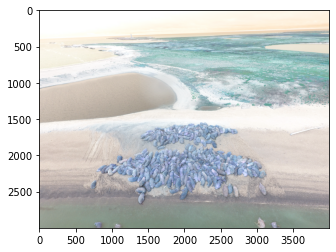

In [40]:
plt.imshow(img)